In [2]:
# asume que los datos estan en ../data/<año>.csv.bz2
# fixme: poner el directorio de data que esté en el repo cuando pusheen los pibes

import sqlite3
import seaborn as sns
import pandas as pd
import time
import os
import shutil
#sns.set(color_codes=True)

# load data
tmp_dir = "./tmp_csv/"
years = ["2006", "2007", "2008"]

In [11]:
#crear directorio con data de delays agrupada por retraso 
if not os.path.exists(tmp_dir):
    os.makedirs(tmp_dir)
    
for year in years:
    if not os.path.exists(tmp_dir+year+".csv"):
        print("Leyendo csv: {}".format(year))
        t = time.time()
        df = pd.read_csv("../data/"+year+".csv.bz2", compression="bz2", usecols=["Month", "Year", "DayofMonth", "DayOfWeek", "DepDelay", "ArrDelay"])    

        #formato mas feliz para fechas
        dates = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')
        df["date"] = dates
        df = df[["date", "DepDelay", "ArrDelay"]]

        df.groupby(by=df['date'].dt.date).mean()
        df.to_csv(tmp_dir+year+".csv")
        del df 
    

Leyendo csv: 2008


2006.csv
2007.csv
2008.csv


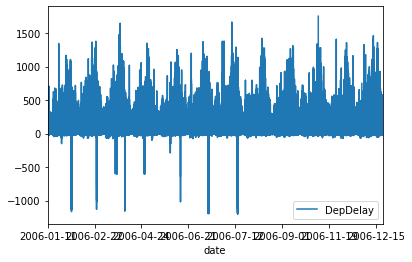

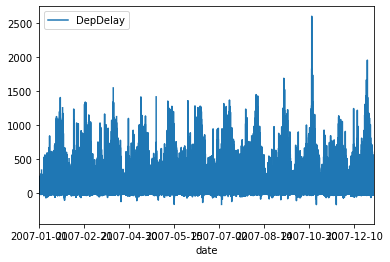

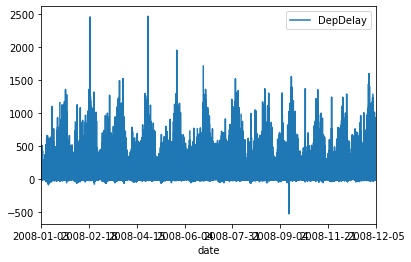

In [12]:
for filename in os.listdir(tmp_dir):
    if filename.endswith(".csv"): 
        print(filename)
        df = pd.read_csv(tmp_dir+filename)
        df.plot(x="date", y="DepDelay", linestyle='-')
        
#fixme: horriples los gŕaficos

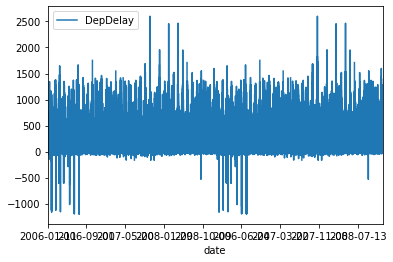

In [3]:
#merge
df = pd.DataFrame(columns=["date", "DepDelay", "ArrDelay"])
for filename in os.listdir(tmp_dir):
    if filename.endswith(".csv"):
        df_input = pd.read_csv(tmp_dir+filename)
        df = pd.concat([df, df_input], sort=False)

df.plot(x="date", y="DepDelay", linestyle='-')
#fixme: gráfico como la gente

In [32]:
df.to_csv(tmp_dir+"merged.csv")

In [ ]:
# CML acá 

In [4]:
#borrar tmp
shutil.rmtree(tmp_dir)